Entrenamos un perceptron para hacer prediccion de mortalidad

In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


#Necesitamos mostrar graficamente las areas de decision con dos variables
#Definimos una funcion para mostrarlas (tomada de Rashka - Python Machine Learning)

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.01):

    # establecemos marcadores y colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # mostramos la superficie de decision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # destacamos los casos de test
    if test_idx is not None:
      if test_idx.shape[0]>0:
        # dibujamos todos
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')






In [2]:
#Importamos los datos de un fichero csv
import pandas as pd
df = pd.read_csv('ejemploMI.csv')
df.tail()


,Unnamed: 0,X,exitus,apache2,tipopaciente,sexopac,edad,sofa,lactato
1360,1364,1364,0,24,QU,Hombre,68,5,1.9
1361,1365,1365,0,18,QP,Hombre,55,5,1.5
1362,1366,1366,0,13,QP,Hombre,68,2,4.9
1363,1367,1367,0,10,QU,Hombre,33,1,1.1
1364,1368,1368,0,8,QP,Hombre,64,4,4.8


In [3]:
import matplotlib.pyplot as plt
import numpy as np               # primero un ejemplo sencillo con solo dos variables (apache y lactato)
X = df.iloc[:,[2,3,8]].values    # la variable X tiene los valores de apache2 (columna 3), lactato (columna 8) y exitus (columna 2,variable resultado)
                                   

print("Clases target iniciales: ",np.unique(X[:,0]))


Clases target iniciales:  [0. 1.]


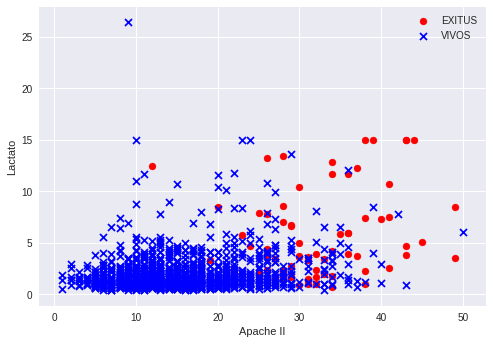

In [8]:
plt.scatter(X[X[:,0]==1,1],X[X[:,0]==1,2],color="red",marker="o",label="EXITUS")
plt.scatter(X[X[:,0]==0,1],X[X[:,0]==0,2],color="blue",marker="x",label="VIVOS")
plt.xlabel("Apache II")
plt.ylabel("Lactato")
plt.legend(loc="upper right")
plt.show()

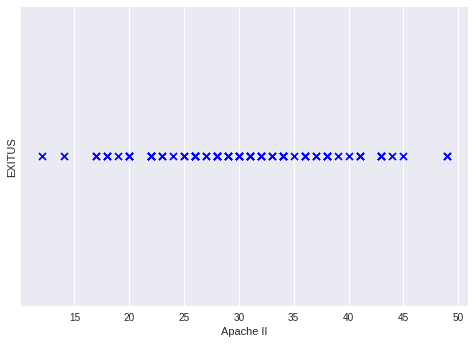

Apache2 minimo de exitus:  12.0


In [26]:
#Podemos ver la distribucion de una sola variable (apache2) ya que nos ofrece una buena manera de detectar pacientes que no deberían haber fallecido

plt.scatter(X[X[:,0]==1,1],np.full((1,X[X[:,0]==1].shape[0]),1),color="blue",marker="x",label="EXITUS")
plt.xlabel("Apache II")
plt.ylabel("EXITUS")
plt.yticks(np.arange(1),('1'))
plt.show()
print('Apache2 minimo de exitus: ',X[X[:,0]==1,1].min())

In [5]:
#Vemos que hay un valor de lactato que se sale de la capacidad de medición del gasómetro (hasta 15). Lo eliminamos ya que es un único valor
df=df[df['lactato']<=15]
print('Lactato máximo',df['lactato'].max())
#Mostramos el apache2 minimo para exitus
print("Apache 2 minimo en exitus",df[df['exitus']==1]['apache2'].min())

Lactato máximo 15.0
Apache 2 minimo en exitus 12


Valores unicos de la clase target  [-1  1]
      apache2  lactato
432        14      2.2
950        12      1.0
869        12      2.0
608        26      3.1
1004        5      1.2
Instancias de exitus: [  87    0 1277]
Intancias en train: [ 61   0 893]
Instancias en test: [ 26   0 384]
Mal clasificados: 30
Bien clasificados: 380
Exitus predicho: 16
Vivo predicho: 394
Falsos exitus: 10
Falsos vivos: 20
Porcentaje de acierto: 0.93 ; si predecimos todos vivos sería del 0.93


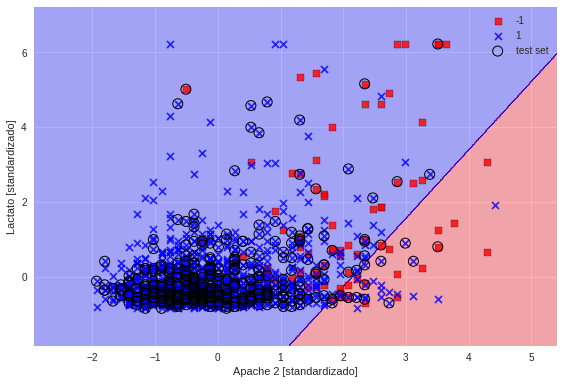

In [59]:
#Ahora entrenamos un perceptron y evaluamos su capacidad predictiva

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

lasX = df.iloc[:,[3,8]]
laY = df.iloc[:,2]
laY = np.where(laY==1,-1,1)  #necesitamos cambiar los valores de la clase resultado a -1,1
print("Valores unicos de la clase target ",np.unique(laY)) 

#Dividimos el dataframe en un set de training y otro de test, homogeneamente representados en cuanto al target
#Guardamos los indices para poder representar en el grafico los valores de test
indices = np.arange(lasX.shape[0])
lasX_train,lasX_test,laY_train,laY_test,indexes_train,indexes_test = train_test_split(lasX,laY,indices,test_size=0.3,random_state=None,stratify=df['exitus'].values)

print(lasX_test.tail())

print("Instancias de exitus:" , np.bincount(laY+1))
print("Intancias en train:" , np.bincount(laY_train+1))
print("Instancias en test:" , np.bincount(laY_test+1))

#Escalamos las variables
sc = StandardScaler()
sc.fit(lasX_train)
lasX_train_std=sc.transform(lasX_train)
lasX_test_std=sc.transform(lasX_test)

#Creamos el perceptron y lo entrenamos
ppn = Perceptron(eta0=0.01,max_iter=500,tol=0.05,random_state=11)
ppn.fit(lasX_train_std,laY_train)

#Realizamos las predicciones y evaluamos
laY_pred = ppn.predict(lasX_test_std)
print('Mal clasificados: %d' % (laY_test!=laY_pred).sum())
print('Bien clasificados: %d' % (laY_test==laY_pred).sum())
print('Exitus predicho: %d' % (-1==laY_pred).sum())
print('Vivo predicho: %d' % (1==laY_pred).sum())


print('Falsos exitus: %d' % ((laY_test==1)&(laY_pred==-1)).sum())
print('Falsos vivos: %d' % ((laY_test==-1)&(laY_pred==1)).sum())

print('Porcentaje de acierto: %.2f' % accuracy_score(laY_test,laY_pred), "; si predecimos todos vivos sería del 0.93")

lasX_combined_std = np.vstack((lasX_train_std, lasX_test_std))
laY_combined = np.hstack((laY_train, laY_test))


plot_decision_regions(X=lasX_combined_std, y=laY_combined,
                      classifier=ppn, test_idx=indexes_test) 
plt.xlabel('Apache 2 [standardizado]')
plt.ylabel('Lactato [standardizado]')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [43]:
# Ahora añadimos otras variables al perceptron: sofa al ingreso y edad

lasX2 = df.iloc[:,[3,6,7,8]]  #sofa esta en la columna 7, edad en la 6
laY2 = df.iloc[:,2]
laY2 = np.where(laY==1,-1,1)   

lasX2_train,lasX2_test,laY2_train,laY2_test = train_test_split(lasX2,laY2,test_size=0.3,random_state=None,stratify=df['exitus'].values)

sc = StandardScaler()
sc.fit(lasX2_train)
lasX2_train_std=sc.transform(lasX2_train)
lasX2_test_std=sc.transform(lasX2_test)


ppn2 = Perceptron(eta0=0.01,max_iter=500,random_state=None)   # cambiamos algo los metaparametros
ppn2.fit(lasX2_train_std,laY2_train)

print("Coeficientes: ",ppn2.coef_,"; Intercept: " ,ppn2.intercept_)

laY2_pred = ppn2.predict(lasX2_test_std)
print('Mal clasificados: %d' % (laY2_test!=laY2_pred).sum())
print('Bien clasificados: %d' % (laY2_test==laY2_pred).sum())
print('Vivo predicho: %d' % (-1==laY2_pred).sum())
print('Exitus predicho: %d' % (1==laY2_pred).sum())


print('Falsos vivos: %d' % ((laY2_test==1)&(laY2_pred==-1)).sum())
print('Falsos exitus: %d' % ((laY2_test==-1)&(laY2_pred==1)).sum())

print('Porcentaje de acierto: %.2f' % accuracy_score(laY2_test,laY2_pred), "; si predecimos todos vivos sería del 0.93")

#Podemos usar el perceptron para clasificar nuevos casos
newcases = np.array([[1, 1,1 ,0] ,[4,3,4,2]])  #Recordamos que son valores estandarizados
print("Casos (lactato, edad,sofa, apache2):" ,newcases,"-> predicciones: ",np.where(ppn2.predict(newcases)==1,"EXITUS","VIVO"))


Coeficientes:  [[0.03080085 0.01146567 0.00089372 0.00491137]] ; Intercept:  [-0.09]
Mal clasificados: 22
Bien clasificados: 388
Vivo predicho: 398
Exitus predicho: 12
Falsos vivos: 18
Falsos exitus: 4
Porcentaje de acierto: 0.95 ; si predecimos todos vivos sería del 0.93
Casos (lactato, edad,sofa, apache2): [[1 1 1 0]
 [4 3 4 2]] -> predicciones:  ['VIVO' 'EXITUS']


In [60]:
#Evaluamos el modelo mediante k-fold cross-validation

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipe_lr = make_pipeline(StandardScaler(),
                        Perceptron(eta0=0.01,max_iter=500,random_state=None))

scores = cross_val_score(estimator=pipe_lr,
                         X=lasX2_train,
                         y=laY2_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))



CV accuracy scores: [0.91752577 0.91666667 0.91666667 0.92631579 0.91578947 0.89473684
 0.86315789 0.95789474 0.93684211 0.92631579]
CV accuracy: 0.917 +/- 0.024


Vemos que no mejoramos la predicción que podría obtenerse si asignaramos a todos el valor VIVO

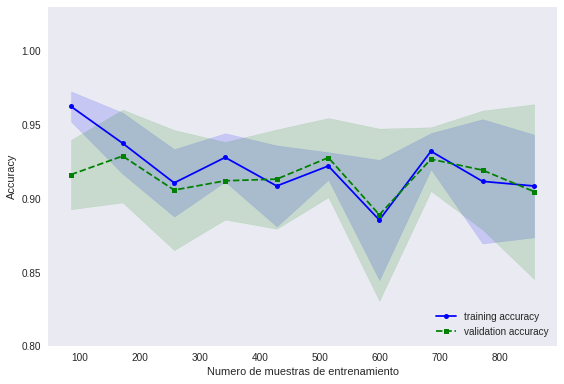

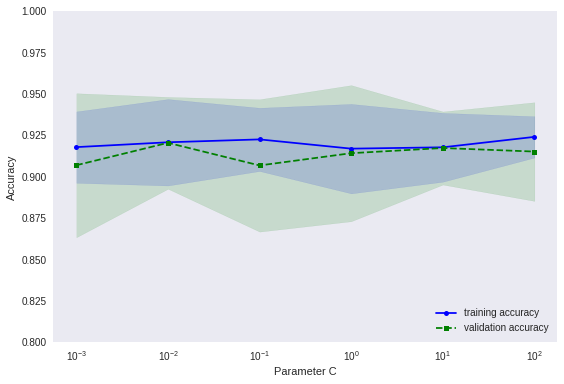

In [41]:
# Valoramos bias y varianza mediante curvas de aprendizaje
# Usamos pipelines


from sklearn.model_selection import learning_curve



train_sizes, train_scores, test_scores =                learning_curve(estimator=pipe_lr,
                               X=lasX2_train,
                               y=laY2_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Numero de muestras de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

# Evaluamos el valor optimo de eta0 mediante curvas de validacion

from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=lasX2_train, 
                y=laY2_train, 
                param_name='perceptron__eta0', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()
